In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [55]:
path_for_plots = './plots'

In [56]:
classes = ['stat.ML', 'stat.TH', 'stat.CO', 'stat.ME', 'stat.OT']
colors = ['red', 'blue', 'green', 'pink', 'grey']

In [57]:
results = {}
for cl in classes:
    results_path = f'../output/best/results/uber/{cl}.csv'
    results[cl] = pd.read_csv(results_path)

In [65]:
attributes = results['stat.CO'].columns[1:13]
attributes

Index(['activation_function', 'embedding_dim', 'batch_size', 'init_lr',
       'n_epochs', 'n_hidden', 'n_cells', 'weight', 'new_metric',
       'train_score', 'cm', 'val_loss'],
      dtype='object')

In [141]:
categorical_attr = attributes[0:3]
numerical_attr = ['init_lr', 'n_epochs', 'n_hidden', 'n_cells', 'new_metric', 'train_score', 'val_loss']

In [135]:
def plot_attribute(attribute, classes, p):
    for i, cl in enumerate(classes):
        best_idx = int(results[cl].shape[0]*p) #get only best p% of results
        best_results = results[cl].head(best_idx) 
        counts = best_results[attribute].value_counts()
        terms = counts.index.map(str)

        plt.bar(terms, counts, color=colors[i])
        plt.title(f'{cl}, {attribute}')
        plt.show()

        path_to_save = f'{path_for_plots}/{cl}/'
        Path(path_to_save).mkdir(parents=True, exist_ok=True)
        plt.savefig(f'{path_to_save}{attribute}.png' )

#### activation_function

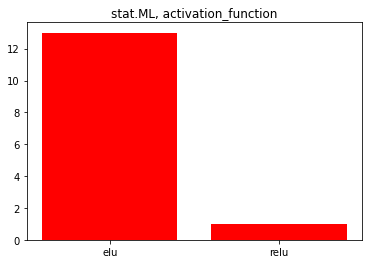

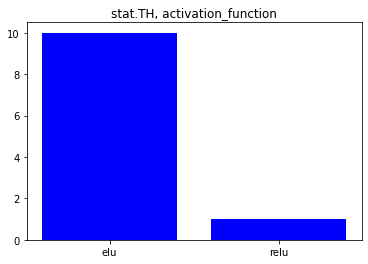

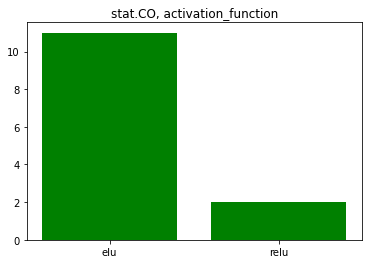

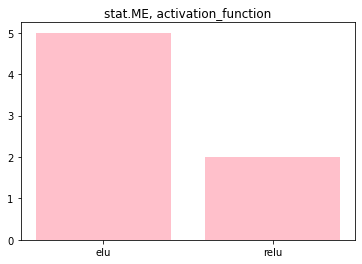

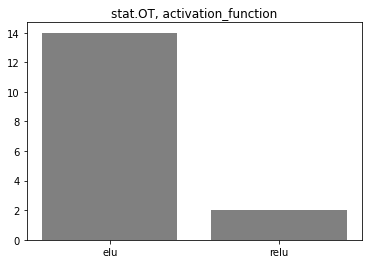

<Figure size 432x288 with 0 Axes>

In [136]:
plot_attribute('activation_function', classes, 0.25)

For every class elu were chosen enormous times more. It's shows that the activation have quite big influence on results and elu was better one. 

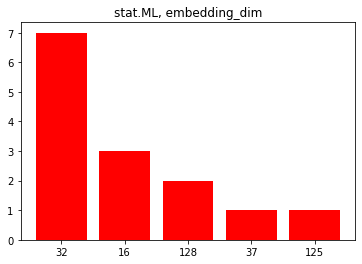

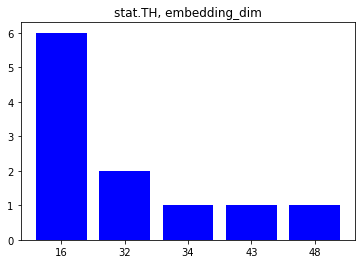

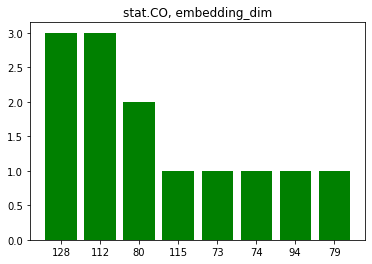

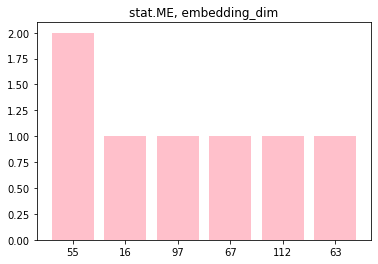

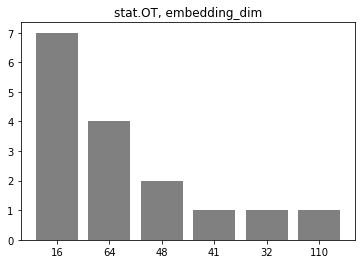

<Figure size 432x288 with 0 Axes>

In [137]:
plot_attribute('embedding_dim', classes, 0.25)

Models with small embedding_size perform better. It's maybe becouse they got less parameters and were harder to overfit.

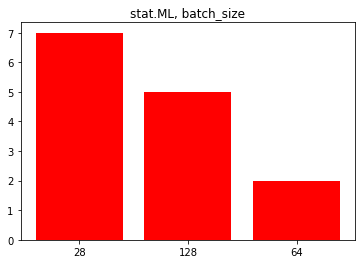

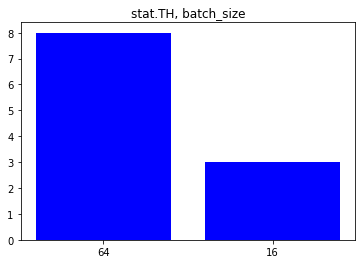

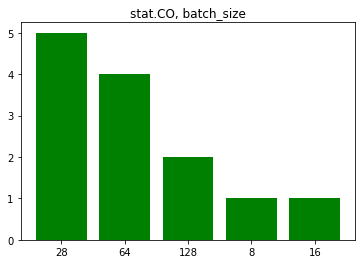

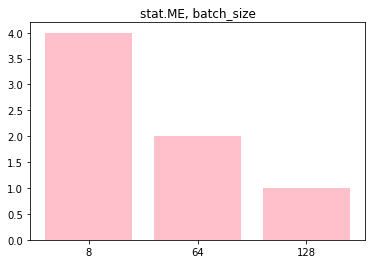

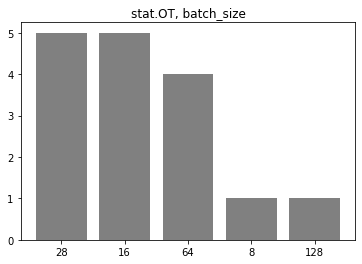

<Figure size 432x288 with 0 Axes>

In [138]:
plot_attribute('batch_size', classes, 0.25)

What we could see is that smaller batch sizes occur more often in almost every class and gives better results. Its probably due to small size of dataset so models could made more steps in one epochs with smaller batch.

In [80]:
import pylab as pl

In [93]:
def hist_attribute(attribute, classes, p):
    for i, cl in enumerate(classes):
        best_idx = int(results[cl].shape[0]*p) #get only best 25% of results
        best_results = results[cl].head(best_idx)

        best_results.hist(column=attribute, figsize=(10, 5), color=colors[i])
        pl.suptitle(cl)
        
        path_to_save = f'{path_for_plots}/{cl}/'
        Path(path_to_save).mkdir(parents=True, exist_ok=True)
        pl.savefig(f'{path_to_save}{attribute}.png' )

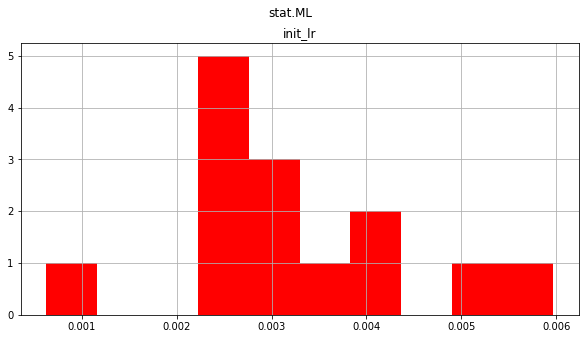

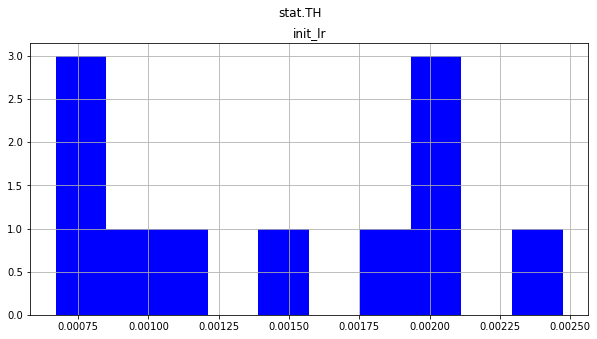

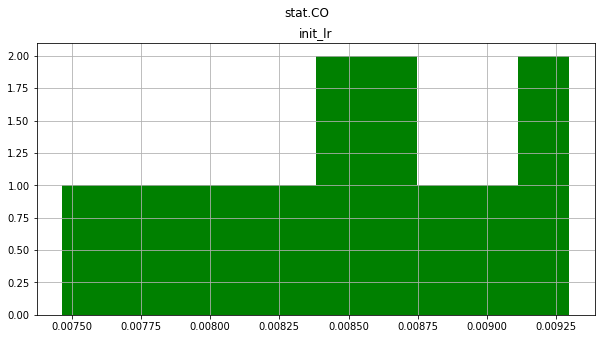

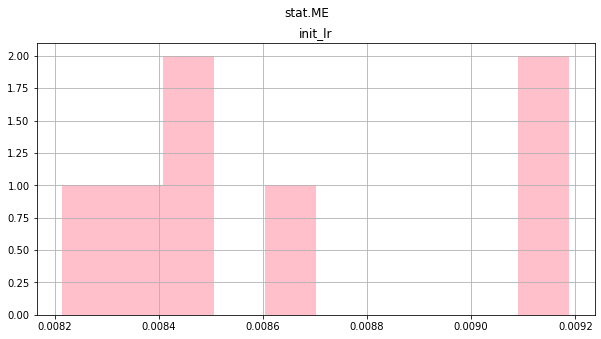

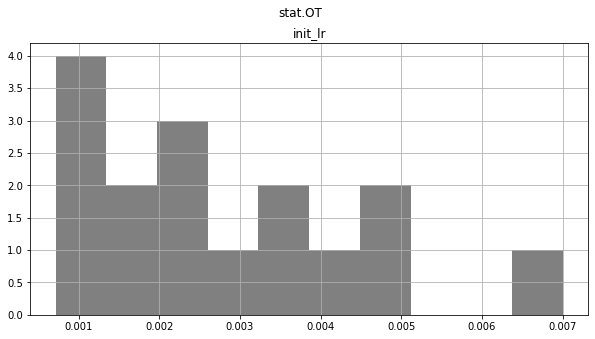

In [94]:
hist_attribute('init_lr', classes, 0.25)

In [125]:
def analize_attribute(attribute, classes, p):
    print(f'Attribute: {attribute}')
    for cl in classes:
        best_idx = int(results[cl].shape[0]*p) #get only best 25% of results
        best_results = results[cl].head(best_idx)

        print(f'Class: {cl}')
        print(f'Best result: {best_results.iloc[0][attribute]}')
        print(f'{int(p*100)}% of best results mean: {best_results[attribute].mean()}')
        print(f'Mean: {results[cl][attribute].mean()}')

        

#### Init_lr

In [144]:
analize_attribute('init_lr', classes, 0.25)

Attribute: init_lr
Class: stat.ML
Best result: 0.0040004060807504
25% of best results mean: 0.0032723109112872857
Mean: 0.003494387574597961
Class: stat.TH
Best result: 0.0010659256477124
25% of best results mean: 0.001456037369158164
Mean: 0.0018837167202505635
Class: stat.CO
Best result: 0.0087380278897099
25% of best results mean: 0.008485802589465378
Mean: 0.007432688560242547
Class: stat.ME
Best result: 0.0082140713174107
25% of best results mean: 0.008639486389498128
Mean: 0.007279196742477941
Class: stat.OT
Best result: 0.0046495284517841
25% of best results mean: 0.0027915234924220686
Mean: 0.0035334090341662032


We could see that despite lr was picked from uniform distribution from (0.0001, 0.01) the best result are gained from much smaller range (0.0014, 0.0086). Whats more, we could see that there is no one best learning rate for all problems.

##### n_epochs

In [145]:
analize_attribute('n_epochs', classes, 0.25)

Attribute: n_epochs
Class: stat.ML
Best result: 3
25% of best results mean: 2.7857142857142856
Mean: 3.6785714285714284
Class: stat.TH
Best result: 6
25% of best results mean: 7.818181818181818
Mean: 5.957446808510638
Class: stat.CO
Best result: 4
25% of best results mean: 5.0
Mean: 5.418181818181818
Class: stat.ME
Best result: 18
25% of best results mean: 10.857142857142858
Mean: 8.379310344827585
Class: stat.OT
Best result: 13
25% of best results mean: 8.5625
Mean: 7.969230769230769


Best results were obtained after small number of epochs. This is confirmed by this fact that the models had a tendency to rapidly overfitting.

##### n_hidden -> it should be n_neurons ;)

In [146]:
analize_attribute('n_hidden', classes, 0.25)

Attribute: n_hidden
Class: stat.ML
Best result: 4
25% of best results mean: 44.357142857142854
Mean: 38.142857142857146
Class: stat.TH
Best result: 16
25% of best results mean: 10.818181818181818
Mean: 22.638297872340427
Class: stat.CO
Best result: 27
25% of best results mean: 28.23076923076923
Mean: 27.654545454545456
Class: stat.ME
Best result: 64
25% of best results mean: 54.285714285714285
Mean: 50.0
Class: stat.OT
Best result: 25
25% of best results mean: 23.75
Mean: 27.2


Best results were gained where dense layer in model wasn't the smallest posibble, n_hidden from range (2, 64), it seems better to use quite bigger models and learn them by few epochs.

n_cells

In [147]:
analize_attribute('n_cells', classes, 0.25)

Attribute: n_cells
Class: stat.ML
Best result: 34
25% of best results mean: 27.071428571428573
Mean: 23.392857142857142
Class: stat.TH
Best result: 44
25% of best results mean: 40.54545454545455
Mean: 36.808510638297875
Class: stat.CO
Best result: 29
25% of best results mean: 39.30769230769231
Mean: 35.70909090909091
Class: stat.ME
Best result: 50
25% of best results mean: 38.714285714285715
Mean: 39.96551724137931
Class: stat.OT
Best result: 50
25% of best results mean: 28.5
Mean: 27.523076923076925


In best models also LSTM layer wasn't that small as i expected. The means for every class are quite close to each other. n_cells chosen from range (4, 128)

##### new_metric

In [148]:
analize_attribute('new_metric', classes, 0.25)

Attribute: new_metric
Class: stat.ML
Best result: 0.6576797846481562
25% of best results mean: 0.5883657671105339
Mean: 0.43892613779053724
Class: stat.TH
Best result: 0.774094883208767
25% of best results mean: 0.747475696247622
Mean: 0.6902212358735992
Class: stat.CO
Best result: 0.7197360835774169
25% of best results mean: 0.7014159657281438
Mean: 0.6565735170192302
Class: stat.ME
Best result: 0.7190396647845333
25% of best results mean: 0.7029068263248085
Mean: 0.6634334082183587
Class: stat.OT
Best result: 0.7031249989013673
25% of best results mean: 0.7031249989013673
Mean: 0.6693928674789247


The biggest problem was to get good values for stat.ML class. The difference between mean of best results for it and for best result is quite big and so is for mean value. For the other classes, the results did not differ so much and were more reproducible. All 25% of best results for stat.OT were equal. That's becouse of huge imbalance between classes, there is only 2 positive examples in test dataset.

##### train_score

In [149]:
analize_attribute('train_score', classes, 0.25)

Attribute: train_score
Class: stat.ML
Best result: 0.91278
25% of best results mean: 0.920915
Mean: 0.8742135714285715
Class: stat.TH
Best result: 1.0
25% of best results mean: 0.9967745454545455
Mean: 0.9613170212765956
Class: stat.CO
Best result: 1.0
25% of best results mean: 0.996393076923077
Mean: 0.978496909090909
Class: stat.ME
Best result: 1.0
25% of best results mean: 0.9990785714285714
Mean: 0.970686896551724
Class: stat.OT
Best result: 1.0
25% of best results mean: 1.0
Mean: 0.9770690769230769


For almost every class training score was near 1. This is another example of the fact that a big problem of the models was that they were overfitted. Only with stat.ML training score is lower and what's interesting the metric score for stat.ML was the worst. It may suggest that models had problem with fitting to this certain class.

##### val_loss

In [150]:
analize_attribute('val_loss', classes, 0.25)

Attribute: val_loss
Class: stat.ML
Best result: 0.7877211570739746
25% of best results mean: 0.7138141202075141
Mean: 0.6578743197023869
Class: stat.TH
Best result: 0.6050737500190735
25% of best results mean: 0.5667060830376365
Mean: 0.6723431424891695
Class: stat.CO
Best result: 0.4257692098617553
25% of best results mean: 0.43240209267689633
Mean: 0.5225018848072399
Class: stat.ME
Best result: 1.1090930700302124
25% of best results mean: 0.7270361270223346
Mean: 0.7880463744031971
Class: stat.OT
Best result: 0.047424528747797
25% of best results mean: 0.14795400248840446
Mean: 0.19807117535517763
